In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

## Data Prepareation
Their are three data set that we use in this project 
1. Ranking : the ranking of each team from(1993-2018). The ranking is measure every month.
2. Match Result : the result of every game from 1993 to 2018
3. World cup 2018 match : The record of match that happen in wc 2018 

Problems found in data:
- 

In [2]:
# import file
match_result = pd.read_csv('./results.csv')
ranking = pd.read_csv('./fifa_ranking.csv')
wc2018 = pd.read_csv('World Cup 2018 Dataset.csv')

### Prepare ranking date set
The rank of each country are calculated by summing weight points in three year period. But unfortunately, the point are start being record in 8/24/2011.

In [3]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
# prepare data for ranking
rankings = ranking[['rank','country_full', 'total_points', 'cur_year_avg_weighted','rank_date']]

In [5]:
rankings = rankings.replace({'IR Iran' : 'Iran'})
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [6]:
rankings.head()

,rank,country_full,total_points,cur_year_avg_weighted,rank_date
0,1,Germany,0.0,0.0,1993-08-08
1,2,Italy,0.0,0.0,1993-08-08
2,3,Switzerland,0.0,0.0,1993-08-08
3,4,Sweden,0.0,0.0,1993-08-08
4,5,Argentina,0.0,0.0,1993-08-08


### Prepare match result data


In [7]:
match_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
matches_result = match_result.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches_result['date'] = pd.to_datetime(matches_result['date'])

matches_result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


### Prepare wc2018 data

In [9]:
wc2018.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [10]:
wc2018s = wc2018[['Team','Group','Previous \nappearances','First match \nagainst', 'Second match\n against', 'Third match\n against']]
wc2018s.head()

,Team,Group,Previous appearances,First match against,Second match against,Third match against
0,Russia,A,10.0,Saudi Arabia,Egypt,Uruguay
1,Saudi Arabia,A,4.0,Russia,Uruguay,Egypt
2,Egypt,A,2.0,Uruguay,Russia,Saudi Arabia
3,Uruguay,A,12.0,Egypt,Saudi Arabia,Russia
4,Porugal,B,6.0,Spain,Morocco,Iran


In [11]:
wc2018s = wc2018s.replace({"IRAN": "Iran", "Costarica": "Costa Rica", "Porugal": "Portugal", "Columbia": "Colombia", "Korea" : "Korea Republic"})
wc2018s = wc2018s.set_index('Team')

In [12]:
wc2018s.head(10)

,Group,Previous appearances,First match against,Second match against,Third match against
Team,,,,,
Russia,A,10.0,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,4.0,Russia,Uruguay,Egypt
Egypt,A,2.0,Uruguay,Russia,Saudi Arabia
Uruguay,A,12.0,Egypt,Saudi Arabia,Russia
Portugal,B,6.0,Spain,Morocco,Iran
Spain,B,14.0,Portugal,Iran,Morocco
Morocco,B,4.0,Iran,Portugal,Spain
Iran,B,4.0,Morocco,Spain,Portugal
France,C,14.0,Australia,Peru,Denmark


## Feature extraction


In [13]:
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

In [14]:
rankings.head()

,rank_date,rank,country_full,total_points,cur_year_avg_weighted
0,2003-01-15,204.0,Afghanistan,0.0,0.0
1,2003-01-16,204.0,Afghanistan,0.0,0.0
2,2003-01-17,204.0,Afghanistan,0.0,0.0
3,2003-01-18,204.0,Afghanistan,0.0,0.0
4,2003-01-19,204.0,Afghanistan,0.0,0.0


In [15]:
# matched + ranks
match_w_rank = matches_result.merge(rankings, left_on=['date', 'home_team'], right_on=['rank_date','country_full'])
match_w_rank.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date,rank,country_full,total_points,cur_year_avg_weighted
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,59.0,Bolivia,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,8.0,Brazil,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,35.0,Ecuador,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,65.0,Guinea,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,67.0,Paraguay,0.0,0.0


In [16]:
match_w_rank = match_w_rank.merge(rankings, left_on=['date','away_team'], right_on=['rank_date','country_full'], suffixes=('_home','_away'))
match_w_rank.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,rank_home,country_full_home,total_points_home,cur_year_avg_weighted_home,rank_date_away,rank_away,country_full_away,total_points_away,cur_year_avg_weighted_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,59.0,Bolivia,0.0,0.0,1993-08-08,22.0,Uruguay,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,8.0,Brazil,0.0,0.0,1993-08-08,14.0,Mexico,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,35.0,Ecuador,0.0,0.0,1993-08-08,94.0,Venezuela,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,65.0,Guinea,0.0,0.0,1993-08-08,86.0,Sierra Leone,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,67.0,Paraguay,0.0,0.0,1993-08-08,5.0,Argentina,0.0,0.0


In [17]:
match_w_rank.drop(['cur_year_avg_weighted_home', 'cur_year_avg_weighted_away'], axis=1, inplace=True)

### Create new feature

In [18]:
# rank&points diff
match_w_rank['rank_diff'] = match_w_rank['rank_home'] = match_w_rank['rank_away']
match_w_rank['total_points_diff'] = match_w_rank['total_points_home'] - match_w_rank['total_points_away']

# score diff
match_w_rank['score_diff'] = match_w_rank['home_score'] - match_w_rank['away_score']


In [19]:
match_w_rank['is_won'] = match_w_rank['score_diff'] > 0 # not count draw
match_w_rank['is_friendly'] = match_w_rank['tournament'] == 'Friendly'
match_w_rank['avg_rank'] = (match_w_rank['rank_away']+match_w_rank['rank_home'])//2

In [20]:
match_w_rank.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_date_away,rank_away,country_full_away,total_points_away,rank_diff,total_points_diff,score_diff,is_won,is_friendly,avg_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,1993-08-08,22.0,Uruguay,0.0,22.0,0.0,2,True,False,22.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,1993-08-08,14.0,Mexico,0.0,14.0,0.0,0,False,True,14.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,1993-08-08,94.0,Venezuela,0.0,94.0,0.0,5,True,False,94.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,1993-08-08,86.0,Sierra Leone,0.0,86.0,0.0,1,True,True,86.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,1993-08-08,5.0,Argentina,0.0,5.0,0.0,-2,False,False,5.0


In [21]:
# MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(match_w_rank[['avg_rank', 'rank_diff', 'total_points_diff', 'is_friendly']])
match_w_rank[['avg_rank', 'rank_diff', 'total_points_diff', 'is_friendly']] = scaler.transform(match_w_rank[['avg_rank', 'rank_diff', 'total_points_diff', 'is_friendly']])

In [22]:
# Robust scaler
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
## TODO
    #scaling
##

In [23]:
match_w_rank.describe()

,home_score,away_score,rank_home,total_points_home,rank_away,total_points_away,rank_diff,total_points_diff,score_diff,is_friendly,avg_rank
count,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000,17739.000000
mean,1.609053,1.065562,78.430464,154.728131,78.430464,149.151144,0.372262,0.493706,0.543492,0.378657,0.372262
std,1.625874,1.249078,52.050922,303.042522,52.050922,293.976589,0.250245,0.060552,2.207231,0.485066,0.250245
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000
25%,0.000000,0.000000,35.000000,0.000000,35.000000,0.000000,0.163462,0.491931,-1.000000,0.000000,0.163462
50%,1.000000,1.000000,71.000000,0.000000,71.000000,0.000000,0.336538,0.491931,0.000000,0.000000,0.336538
75%,2.000000,2.000000,115.000000,187.480000,115.000000,171.605000,0.548077,0.491931,2.000000,1.000000,0.548077
max,31.000000,17.000000,209.000000,1770.060000,209.000000,1770.060000,1.000000,1.000000,31.000000,1.000000,1.000000


### Visualize
more in future lol

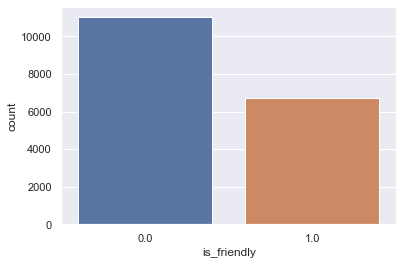

In [24]:
sb.set(style='darkgrid')
sb.countplot(x='is_friendly', data=match_w_rank)

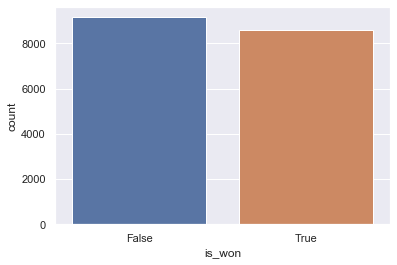

In [25]:
sb.countplot(x='is_won', data=match_w_rank)

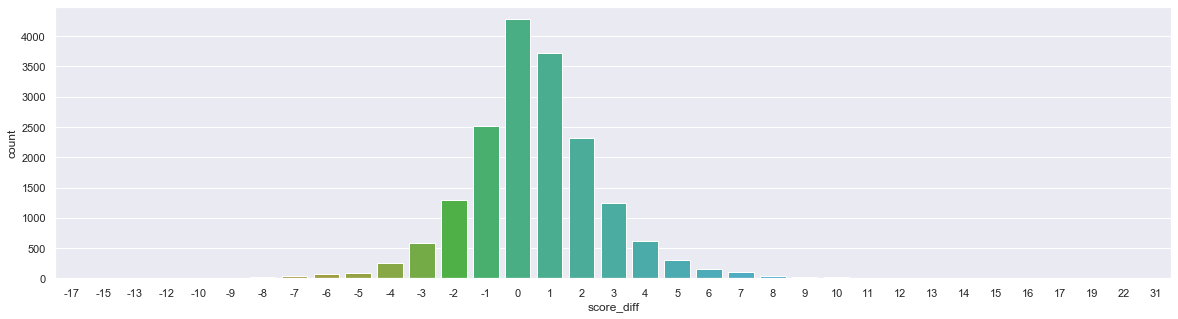

In [26]:
fig,ax0 = plt.subplots(figsize=(20,5))
sb.countplot(x='score_diff', data=match_w_rank)

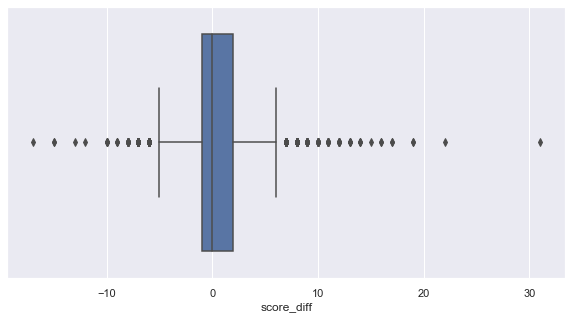

In [27]:
# find outlier
fig,_ = plt.subplots(figsize=(10,5))
sb.boxplot(x=match_w_rank['score_diff']) 

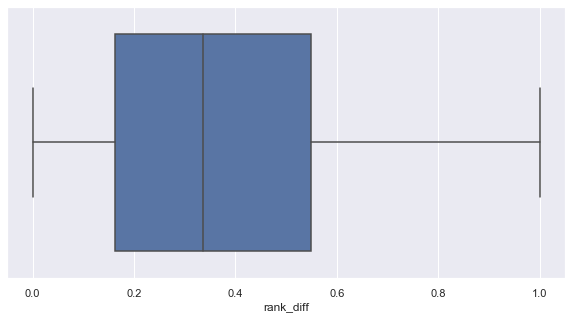

In [28]:
# find outlier
fig,_ = plt.subplots(figsize=(10,5))
sb.boxplot(x=match_w_rank['rank_diff']) # already scale lol

## Model

### Binary Classifier (won/lost)
1. Logistic regression ( w/ , w/o polynomial feature )
2. 

### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [30]:
x,y=match_w_rank[['avg_rank', 'rank_diff', 'total_points_diff', 'is_friendly']].values, match_w_rank[['is_won']].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

D:\Programs\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


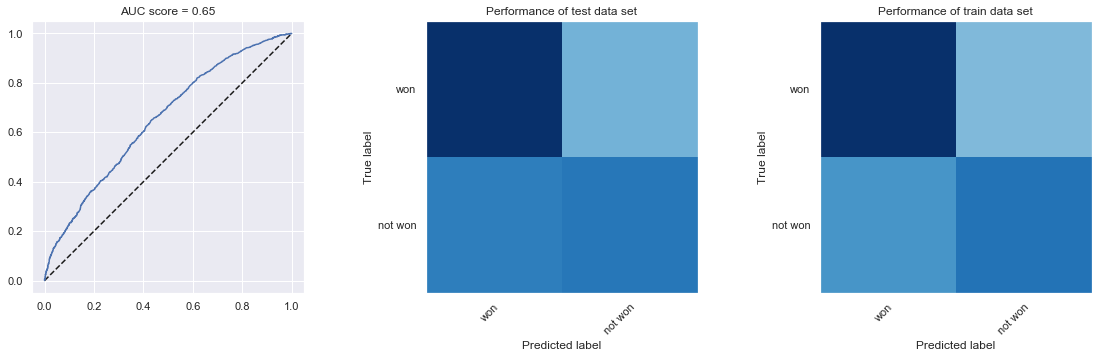

In [31]:
# normal logstic regression
model_logistic = LogisticRegression(C=0.7, solver='liblinear')
model_logistic.fit(x_train, y_train)

# ROC
fpr, tpr, _ = roc_curve(y_test,model_logistic.predict_proba(x_test)[:,1])
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(131)
ax.plot([0,1],[0,1], 'k--') # / line
ax.plot(fpr,tpr) # curve
ax.set_title('AUC score = {0:.2f}'.format(roc_auc_score(y_test,model_logistic.predict_proba(x_test)[:,1])))
ax.set_aspect(1)

# Confusion matrix on test
ax2 = f.add_subplot(132)
cm = confusion_matrix(y_test,model_logistic.predict(x_test))
ax2.imshow(cm,cmap='Blues', clim = (0, cm.max())) 
ax2.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=['won', 'not won'], yticklabels=['won', 'not won'],
           title='Performance of test data set',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax2.grid(False)

# Confusion on train
ax3 = f.add_subplot(133)
cm2 = confusion_matrix(y_train,model_logistic.predict(x_train))
ax3.imshow(cm2,cmap='Blues', clim = (0, cm2.max())) 
ax3.set(xticks=np.arange(cm2.shape[1]),
           yticks=np.arange(cm2.shape[0]),
           xticklabels=['won', 'not won'], yticklabels=['won', 'not won'],
           title='Performance of train data set',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax3.grid(False)


In [32]:
# normalize cm 
cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

array([[0.67699115, 0.32300885],
       [0.49137931, 0.50862069]])

In [33]:
model_logistic.score(x_test,y_test)

0.5944193912063134

#### Polynomial feature

In [34]:
# polynomial feature 
from sklearn.pipeline import Pipeline

In [35]:
# degree = 2
log = LogisticRegression(C=0.7)
features = PolynomialFeatures(degree=2)
model_log_2 = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', log)
])

model_log_2.fit(x_train,y_train)

D:\Programs\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programs\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logistic_regression',
                 LogisticRegression(C=0.7, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

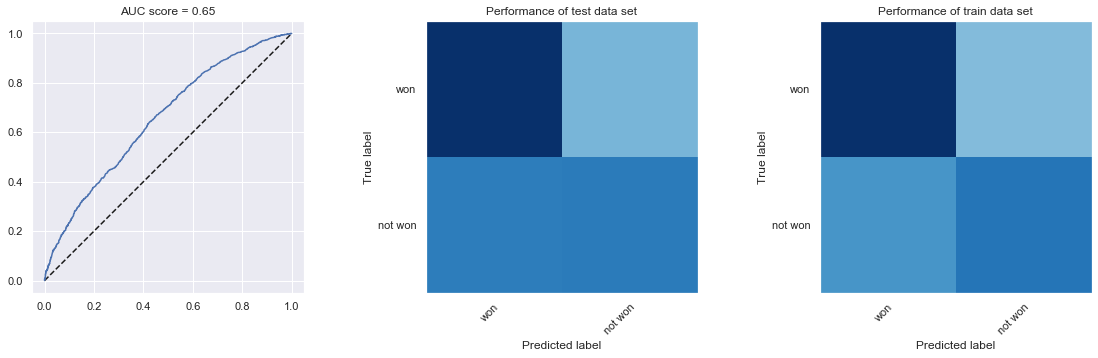

In [36]:
# ROC
fpr, tpr, _ = roc_curve(y_test,model_log_2.predict_proba(x_test)[:,1])
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(131)
ax.plot([0,1],[0,1], 'k--') # / line
ax.plot(fpr,tpr) # curve
ax.set_title('AUC score = {0:.2f}'.format(roc_auc_score(y_test,model_log_2.predict_proba(x_test)[:,1])))
ax.set_aspect(1)

# Confusion matrix on test
ax2 = f.add_subplot(132)
cm = confusion_matrix(y_test,model_log_2.predict(x_test))
ax2.imshow(cm,cmap='Blues', clim = (0, cm.max())) 
ax2.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=['won', 'not won'], yticklabels=['won', 'not won'],
           title='Performance of test data set',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax2.grid(False)

# Confusion on train
ax3 = f.add_subplot(133)
cm2 = confusion_matrix(y_train,model_log_2.predict(x_train))
ax3.imshow(cm2,cmap='Blues', clim = (0, cm2.max())) 
ax3.set(xticks=np.arange(cm2.shape[1]),
           yticks=np.arange(cm2.shape[0]),
           xticklabels=['won', 'not won'], yticklabels=['won', 'not won'],
           title='Performance of train data set',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
ax3.grid(False)

SVC

In [37]:
from sklearn.svm import SVC

In [38]:
model_svc = SVC(C=0.5)
model_svc.fit(x_train,y_train)
print(model_svc.score(x_test, y_test))

D:\Programs\anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5907553551296505


### Regression (score diff)
predict score difference note that we only focus on score difference not the actual score (3-1 is equal to 2-0)
1. Linear regression (no/poly)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
match_w_rank.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_date_away,rank_away,country_full_away,total_points_away,rank_diff,total_points_diff,score_diff,is_won,is_friendly,avg_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,1993-08-08,22.0,Uruguay,0.0,0.100962,0.491931,2,True,0.0,0.100962
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,1993-08-08,14.0,Mexico,0.0,0.062500,0.491931,0,False,1.0,0.062500
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,1993-08-08,94.0,Venezuela,0.0,0.447115,0.491931,5,True,0.0,0.447115
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,1993-08-08,86.0,Sierra Leone,0.0,0.408654,0.491931,1,True,1.0,0.408654
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,1993-08-08,5.0,Argentina,0.0,0.019231,0.491931,-2,False,0.0,0.019231


In [41]:
X,y_reg = match_w_rank[['rank_diff','is_friendly','avg_rank','total_points_diff']].values,match_w_rank['score_diff'].values
x_train,x_test,y_train,y_test = train_test_split(X,y_reg, test_size=0.2)

In [42]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model_lin.score(x_test,y_test)

0.13293739267383065

In [44]:
mean_squared_error(y_test,model_lin.predict(x_test))

4.553514597078429

In [45]:
# poly
model_lin_poly = LinearRegression()
poly = PolynomialFeatures(degree=2)
pipeline = Pipeline([
    ('polynomial_features', poly),
    ('linear_regression', model_lin_poly)
])
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [46]:
pipeline.score(x_test,y_test)

0.13998193988886876

In [47]:
mean_squared_error(y_test,pipeline.predict(x_test))

4.516519057999187

### SVR

In [49]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(C=0.5,kernel='rbf')
svr.score(x_test)